In [1]:
#Project 3 Global Response, Policies and Analysis
#Intro: The purpose of this code is to compare a dataset with Global Plastic Law database to see if there is a correlation between legislation and plastic waste generated. 

In [11]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import re
from decimal import Decimal



In [12]:
#Define the paths and read the .csv file
df= pd.read_csv('Supplementary_Table_poor_man`s_handbag.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 13 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Country                                      191 non-null    object 
 1   Economy                                      190 non-null    object 
 2   Plastic waste generated                      148 non-null    object 
 3   Inadequately managed plastic waste           148 non-null    object 
 4   Plastic waste littered                       148 non-null    object 
 5   Mismanaged plastic waste rate                148 non-null    float64
 6   Mismanaged plastic waste 2010                148 non-null    object 
 7   Mismanaged plastic waste in 2025
 [tonnes]7  149 non-null    object 
 8   Legislation                                  191 non-null    object 
 9   Restriction                                  92 non-null     object 
 10  Ag

In [13]:
#Cleaning and reorganizing Data 

#Find the missing rows 

print(df.isnull().sum())

Country                                          61
Economy                                          62
Plastic waste generated                         104
Inadequately managed plastic waste              104
Plastic waste littered                          104
Mismanaged plastic waste rate                   104
Mismanaged plastic waste 2010                   104
Mismanaged plastic waste in 2025\n [tonnes]7    103
Legislation                                      61
Restriction                                     160
Agricultural employment                          77
Export/Import                                    74
Foreign direct investment                        69
dtype: int64


In [14]:
#Find the missing rows
#Columns: 
missing_rows_Plastic_waste_generated=df[df['Plastic waste generated'].isnull()]
print(missing_rows_Plastic_waste_generated)

         Country Economy Plastic waste generated  \
0    Afghanistan      LI                     NaN   
3        Andorra      HI                     NaN   
7        Armenia     UMI                     NaN   
9        Austria      HI                     NaN   
10    Azerbaijan     UMI                     NaN   
..           ...     ...                     ...   
247          NaN     NaN                     NaN   
248          NaN     NaN                     NaN   
249          NaN     NaN                     NaN   
250          NaN     NaN                     NaN   
251          NaN     NaN                     NaN   

    Inadequately managed plastic waste Plastic waste littered  \
0                                  NaN                    NaN   
3                                  NaN                    NaN   
7                                  NaN                    NaN   
9                                  NaN                    NaN   
10                                 NaN            

In [15]:
#Find the missing rows
#Columns: 
missing_rows_Inadequately_managed_plastic_waste=df[df['Inadequately managed plastic waste'].isnull()]
print(missing_rows_Inadequately_managed_plastic_waste)


         Country Economy Plastic waste generated  \
0    Afghanistan      LI                     NaN   
3        Andorra      HI                     NaN   
7        Armenia     UMI                     NaN   
9        Austria      HI                     NaN   
10    Azerbaijan     UMI                     NaN   
..           ...     ...                     ...   
247          NaN     NaN                     NaN   
248          NaN     NaN                     NaN   
249          NaN     NaN                     NaN   
250          NaN     NaN                     NaN   
251          NaN     NaN                     NaN   

    Inadequately managed plastic waste Plastic waste littered  \
0                                  NaN                    NaN   
3                                  NaN                    NaN   
7                                  NaN                    NaN   
9                                  NaN                    NaN   
10                                 NaN            

In [16]:
#Find the missing rows
#Columns: 
missing_rows_Plastic_waste_littered=df[df['Plastic waste littered'].isnull()]
print(missing_rows_Plastic_waste_littered)

         Country Economy Plastic waste generated  \
0    Afghanistan      LI                     NaN   
3        Andorra      HI                     NaN   
7        Armenia     UMI                     NaN   
9        Austria      HI                     NaN   
10    Azerbaijan     UMI                     NaN   
..           ...     ...                     ...   
247          NaN     NaN                     NaN   
248          NaN     NaN                     NaN   
249          NaN     NaN                     NaN   
250          NaN     NaN                     NaN   
251          NaN     NaN                     NaN   

    Inadequately managed plastic waste Plastic waste littered  \
0                                  NaN                    NaN   
3                                  NaN                    NaN   
7                                  NaN                    NaN   
9                                  NaN                    NaN   
10                                 NaN            

In [17]:
#Find the missing rows
#Columns: 
missing_rows_Mismanaged_plastic_waste_rate=df[df['Mismanaged plastic waste rate'].isnull()]
print(missing_rows_Mismanaged_plastic_waste_rate)

missing_rows_Mismanaged_plastic_waste_2010=df[df['Mismanaged plastic waste 2010'].isnull()]
print(missing_rows_Mismanaged_plastic_waste_2010)

missing_rows_Legislation=df[df['Legislation'].isnull()]
print(missing_rows_Legislation)

missing_rows_Restriction=df[df['Restriction'].isnull()]
print(missing_rows_Restriction)

missing_rows_Agricultural_employment=df[df['Agricultural employment'].isnull()]
print(missing_rows_Agricultural_employment)

missing_rows_Export_Import=df[df['Export/Import'].isnull()]
print(missing_rows_Export_Import)
#Split or find a regex expression check back on this later.

pattern = r"W/W"
text = "Export/Import"
match = re.search(pattern,text)
#Code based on website I found, I tailored it to this expression. Find reference on the bottom of this code.

missing_rows_Foreign_direct_investment=df[df['Foreign direct investment'].isnull()]
print(missing_rows_Foreign_direct_investment)


         Country Economy Plastic waste generated  \
0    Afghanistan      LI                     NaN   
3        Andorra      HI                     NaN   
7        Armenia     UMI                     NaN   
9        Austria      HI                     NaN   
10    Azerbaijan     UMI                     NaN   
..           ...     ...                     ...   
247          NaN     NaN                     NaN   
248          NaN     NaN                     NaN   
249          NaN     NaN                     NaN   
250          NaN     NaN                     NaN   
251          NaN     NaN                     NaN   

    Inadequately managed plastic waste Plastic waste littered  \
0                                  NaN                    NaN   
3                                  NaN                    NaN   
7                                  NaN                    NaN   
9                                  NaN                    NaN   
10                                 NaN            

In [18]:
#Drop rows with missing information
df_one = df.dropna(how='any')
#Review revised row count
df.count()

Country                                         191
Economy                                         190
Plastic waste generated                         148
Inadequately managed plastic waste              148
Plastic waste littered                          148
Mismanaged plastic waste rate                   148
Mismanaged plastic waste 2010                   148
Mismanaged plastic waste in 2025\n [tonnes]7    149
Legislation                                     191
Restriction                                      92
Agricultural employment                         175
Export/Import                                   178
Foreign direct investment                       183
dtype: int64

In [19]:
#Check revised dataframe
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 13 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Country                                      191 non-null    object 
 1   Economy                                      190 non-null    object 
 2   Plastic waste generated                      148 non-null    object 
 3   Inadequately managed plastic waste           148 non-null    object 
 4   Plastic waste littered                       148 non-null    object 
 5   Mismanaged plastic waste rate                148 non-null    float64
 6   Mismanaged plastic waste 2010                148 non-null    object 
 7   Mismanaged plastic waste in 2025
 [tonnes]7  149 non-null    object 
 8   Legislation                                  191 non-null    object 
 9   Restriction                                  92 non-null     object 
 10  Ag

,Country,Economy,Plastic waste generated,Inadequately managed plastic waste,Plastic waste littered,Mismanaged plastic waste rate,Mismanaged plastic waste 2010,Mismanaged plastic waste in 2025\n [tonnes]7,Legislation,Restriction,Agricultural employment,Export/Import,Foreign direct investment
0,Afghanistan,LI,NaN,NaN,NaN,NaN,NaN,NaN,Restriction,Retail Distribution and Importation,2.0,70.6,-4.6
1,Albania,UMI,"174,391.68","77,896.58","3,487.83",0.03,"29,705.31","63,051",Restriction,"Manufacture, Retail Distribution, and Importation",3.1,118.8,-9.6
2,Algeria,UMI,"2,374,213.57","1,378,692.71","47,484.27",0.09,"520,554.60","1,017,444",Restriction,Importation,5.0,209.8,5.7
3,Andorra,HI,NaN,NaN,NaN,NaN,NaN,NaN,Restriction,Retail Distribution and Importation,1.3,87.2,2.6
4,Angola,LMI,"235,588.95","166,596.76","4,711.78",0.05,"62,527.62","136,770",Disposal regulation,NaN,0.2,376.0,23.8


In [20]:

clean_data = ['Country','Economy','Plastic waste generated','Inadequately managed plastic waste','Plastic waste littered','Mismanaged plastic waste rate','Mismanaged plastic waste 2010','Mismanaged plastic waste in 2025\n [tonnes]7','Legislation','Restriction','Agricultural employment','Export/Import','Foreign direct investment']                      
clean_data_df=df[clean_data]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 13 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Country                                      191 non-null    object 
 1   Economy                                      190 non-null    object 
 2   Plastic waste generated                      148 non-null    object 
 3   Inadequately managed plastic waste           148 non-null    object 
 4   Plastic waste littered                       148 non-null    object 
 5   Mismanaged plastic waste rate                148 non-null    float64
 6   Mismanaged plastic waste 2010                148 non-null    object 
 7   Mismanaged plastic waste in 2025
 [tonnes]7  149 non-null    object 
 8   Legislation                                  191 non-null    object 
 9   Restriction                                  92 non-null     object 
 10  Ag

In [ ]:
# Visualizations
#Intro: The following analysis will look into mismanaged plastic waste rate,plastic waste generated by legislation, economic type and frequency of legislation type.

In [26]:
#Figure 1: Countries with most mismanaged Plastic Waste Rate (Plastic Bags). 

clean_data_df.sort_values(by= ['Mismanaged plastic waste rate'], 
                          ascending=False)
              

,Country,Economy,Plastic waste generated,Inadequately managed plastic waste,Plastic waste littered,Mismanaged plastic waste rate,Mismanaged plastic waste 2010,Mismanaged plastic waste in 2025\n [tonnes]7,Legislation,Restriction,Agricultural employment,Export/Import,Foreign direct investment
160,Sri Lanka,UMI,"5,163,689.27","4,256,119.57","103,273.79",0.30,"1,591,178.57","1,918,670",Restriction,"Manufacture, Retail Distribution, and Importation",32.0,57.9,2.8
185,Vanuatu,LMI,"73,933.38","60,104.46","1,478.67",0.24,"22,477.84","38,006",Restriction,"Manufacture, Retail Distribution, and Importation",59.9,NaN,NaN
103,Maldives,UMI,"126,076.82","83,694.58","2,521.54",0.22,"31,468.88","40,143",No national law found,NaN,32.2,86.7,2.1
69,Guyana,UMI,"299,541.91","109,084.19","5,990.84",0.22,"42,002.38","36,103",Disposal regulation,NaN,18.3,26.2,NaN
173,Trinidad and Tobago,HI,"4,880,578.08","160,103.50","97,611.56",0.19,"94,066.00","73,512",Disposal regulation,NaN,68.0,57.8,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


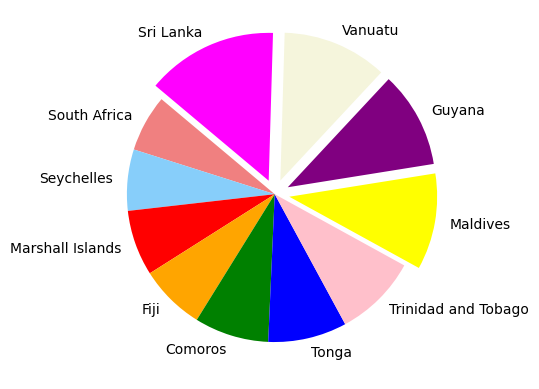

In [66]:
#Figure 1: Mismanaged plastic waste rate by country 
#Include sorting the dataframe in your calculations
#Labels for the sections of our pie chart
labels = ["South Africa","Seychelles","Marshall Islands","Fiji","Comoros","Tonga","Trinidad and Tobago","Maldives","Guyana","Vanuatu","Sri Lanka"]
x="Country"

# The values of each section of the pie chart
sizes= [0.13,0.14,0.15,0.15,0.17,0.18,0.19,0.22,0.22,0.24,0.30]


# The colors of each section of the pie chart
colors = ["lightcoral", "lightskyblue","red", "orange","green","blue", "pink","yellow","purple","beige","magenta"]


explode = (0,0,0,0,0,0,0,0.1,0.1,0.1,0.1)  

plt.pie(sizes,explode=explode, labels=labels,colors=colors, startangle=140)
plt.show()




<Figure size 2500x2000 with 0 Axes>

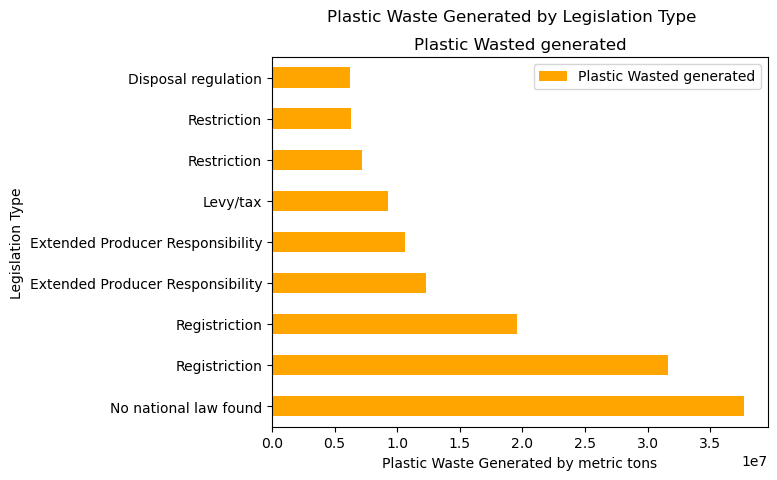

In [270]:
#Figure 2: Plastic waste generated based on Legislation Type.  
x_axis = ['No national law found','Registriction','Registriction','Extended Producer Responsibility','Extended Producer Responsibility','Levy/tax','Restriction','Restriction','Disposal regulation']
Plastic_waste_generated =[37729383.11,31665388.01,19605619.66,12271559.02,10660504.72,9253292.65,7200575.96,6281173.39,6237652.9]
plt.figure(figsize=(25,20))
index=x_axis 
bar_width=0.8
plt.tight_layout()
df = pd.DataFrame({'Plastic Wasted generated':Plastic_waste_generated},index=index)
ax = df.plot.barh(title='Plastic Waste Generated by Legislation Type',xlabel='Plastic Waste Generated by metric tons',ylabel='Legislation Type',color='orange',subplots=True)

#Based on Top 10 Countries that produce most waste 

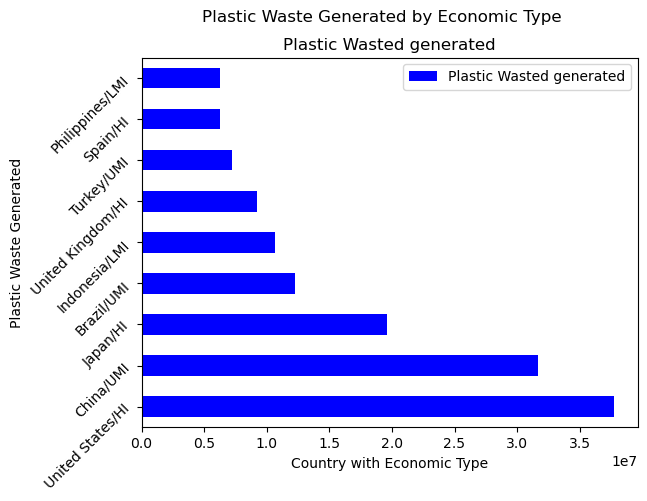

In [268]:
#Figure 3: Plastic waste generated based on Legislation Type.  
index = ['United States/HI','China/UMI','Japan/HI','Brazil/UMI','Indonesia/LMI','United Kingdom/HI','Turkey/UMI','Spain/HI','Philippines/LMI']
Plastic_waste_generated =[37729383.11,31665388.01,19605619.66,12271559.02,10660504.72,9253292.65,7200575.96,6281173.39,6237652.93]
df = pd.DataFrame({'Plastic Wasted generated':Plastic_waste_generated},index=index)

ax = df.plot.barh(title='Plastic Waste Generated by Economic Type',xlabel='Country with Economic Type',ylabel='Plastic Waste Generated',color='blue',rot=45, subplots=True)

#Based on top 10 countries that produce most waste


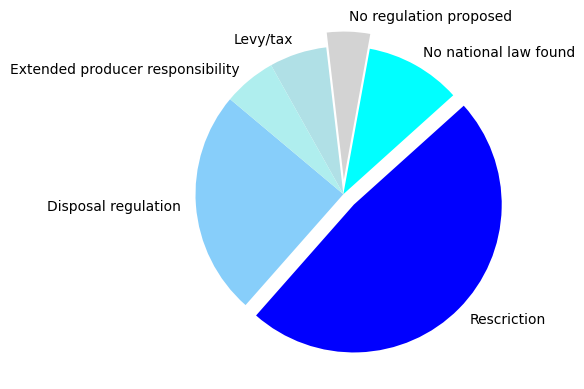

In [273]:
#Figure 4: Frequency of legislation and restriction
#Which legislation type is most popular 

#Labels for the sections of our pie chart
labels = ['Disposal regulation','Rescriction','No national law found','No regulation proposed','Levy/tax','Extended producer responsibility']
x="Legislation"

# The values of each section of the pie chart
sizes =[47,92,20,9,12,11]

#Counted manually by sorting values.

# The colors of each section of the pie chart
colors = ["lightskyblue", "blue", "cyan","lightgray","PowderBlue","PaleTurquoise"]
explode = (0,0.1,0,0.1,0,0)  

plt.pie(sizes,explode=explode, labels=labels,colors=colors, startangle=140)
plt.show()






In [ ]:
#Analysis

#In Figure 1, contrary to the belief, the charts indicate higher mismanagement rates lead to lower plastic waste generated. 
#However, these countries are smaller and tend to receive plastic from external sources. 
#For example, Maldives, Guyana, Vanuatu, and Sri Lanka have higher mismanagement rates of 20 but produce less waste. 
#Compared to countries that produce more waste but have lower rates (U.S, China, Japan,etc). 
#The following figure titled, “Plastic Waste Generated by Legislation Type”, shows that legislation types such as having restrictions and regulations do produce less plastic waste while those with no national law produced the most. 
#On Figure 3, “Plastic Waste Generated by Economic Type” examines the same variables of plastic waste generated and country but examines if there is a trend between the type of economy of each country. 
#Interestingly, these are higher-income (HI) and upper-middle-income (UMI) countries. The results of legislation and economic type vary. 
#The US, Japan, and Spain are HI but the latter have lower waste compared to the US. 
#Finally “Frequency of legislation and restriction” shows that restriction is the most popular restriction type followed by disposal regulation. 



In [ ]:
#Comparison to Global Laws Database (See references for website)
#Method:
#Laws were found on the database using the filters provided, usually clicking on “explore laws search”, region, and/ or by-product or law type.


#Based on the Global Law Database, there are 1246 total laws on plastic. 
#By topic, Waste Management has 77 laws, Plastic Bags has 632 laws, Cigarette and e-cigs have 18 laws, Food/drink packaging has 92 laws, other packaging has 14 laws, Hygiene products has 19 laws, straws have 114 laws, tableware has 110 laws, multiple have 280 laws and finally other with 105 laws(Global Plastic Laws,2023). 
#According to the previous figure, Sri Lanka has a higher mismanagement rate yet less waste. 
#Researching the database, Sri Lanka has 1 national law focused on reduction called Order No. 2034/33 (2017) that addresses, “The order prohibits the sale, distributing for free, display, or manufacture for in-country use of polythene products 20 microns or less. 
#The order includes exemptions and exceptions may be granted (Global Plastic Laws,2023).”  
#The United States has the lowest mismanagement but produces the most plastic waste. According to the database they have a total of 975 plastic laws and of those 492 are on plastic bags.
#However, these laws are mostly city-based rather than national(Global Plastic Laws,2023). 
#Coinciding with the previous dataset, the United States has yet to implement a national law on plastic bag use(Global Plastic Laws,2023 & Gibson,2020).
#California in 2014 implemented the first statewide prohibition of plastic bags with  Senate Bill No 270 that prohibits, “stores from distributing reusable bags unless they fit certain requirements(Global Plastic Laws,2023).” 




#The next figures, examined plastic generated by legislation type and economic type. 
#No national law produces most waste and those with restrictions produce less. 
#The first country is the US, which was previously mentioned has no national law. 
#China, Japan, Turkey, and Spain have restrictions but the amount of plastic waste varies.  
#China has 1 national law adopted in 2020 that covers all 8 topics of Plastic laws. 
#The order called, “National Development and Reform Commission Ministry of Ecology and Environment About Opinions on further strengthening plastic pollution control” hopes to, “​​establish and improve the management system for the production, circulation, use, recycling, and disposal of plastic products, effectively control plastic pollution in an orderly and effective manner (Global Plastic Laws)”. 
#Spain is the country with the least waste with a restriction and of the 14 laws listed three are national and six are focused on plastic bags from 2018-2022. 
#To conclude, the previous dataset showed that restrictions and disposal regulations are the most popular type of legislation. 
#In the database, there are ‘reduction’ and ‘waste management’ options. 
#The reduction has the most with 1156 laws, with 133 only national.  
#Waste management has 77, and 65 are national. 
#This coincides with the database since restriction had the most, disposal regulation is another form of waste management. 

In [ ]:
#Global Action

#As a result of sustainability, a global treaty has been proposed. 
#The key issue at hand is whether the Global Plastics Treaty (GPT) should reduce or restrict the production of primary plastic polymers. 
#Some member states argue that capping plastic polymer production is essential to stop plastic pollution at its source, while others emphasize the economic significance of plastics and suggest focusing on pollution control. 
#The Zero Draft highlights the need for a fair transition for affected populations, including vulnerable groups, as some developing countries express concerns about the impact of the treaty on their economies and employment in the plastics industry. 
#The goal is to reach an agreement by the end of 2024 through negotiations and intersessional work, following UNEA Resolution 5/14's call for sustainable plastic production and circular economy principles. Key considerations include controlling virgin plastic polymer production, implementing a global monitoring and reporting framework, securing adequate and stable funding, ensuring transparency and chemical restrictions, and adopting a truly circular approach to plastics. 
#Lessons from the Paris Agreement's NDC approach should inform the GPT's national action plan framework to strike a balance between national and international obligations.

In [ ]:
#Conclusion and further research

#Therefore, there is inconsistency in the efficacy of Plastic laws and global response. 
#Limitations to this analysis can be related to how the data was collected and manipulated, and the need for another dataset for comparison. 
#Some countries are bigger so the rates may reflect this.  
#Further research can compare with more countries instead of the top 10 most or least. 
#Also, most of these laws listed in the database were adopted later than the date of the plastic bag dataset. 
#Therefore, another follow-up on specific laws of each country and analyzing which ones are more effective is recommended. 
#Another recommendation is to analyze the treaty's efficacy in the future since it was been adopted just a few months ago. Analyzing how does export/import of plastic waste is by country and seeing if there’s a relationship with laws implemented is another idea too. 

In [ ]:
#References and Notes

#Biography: Gibson, Lydia (2020), “Country-level plastic bag legislation against plastic waste and select Human Development Indices”, Mendeley Data, V1, doi: 10.17632/wtvnv9fv44.1 
#“Plastic Pollution Facts.” Plastic Pollution Coalition, 31 Aug. 2023, www.plasticpollutioncoalition.org/learn/plastic-pollution-facts. 
#“From Birth to Ban: A History of the Plastic Shopping Bag.” UNEP, UN Environment Programme, 20 Dec. 2021, www.unep.org/news-and-stories/story/birth-ban-history-plastic-shopping-bag#:~:text=2002%20%E2%80%93%20Bangladesh%20is%20the%20first,countries%20begin%20to%20follow%20suit. 
#Jahan, A R Tahseen. “What Happened to Bangladesh’s Polythene Ban?” The Confluence, 8 Oct. 2023, theconfluence.blog/what-happened-to-bangladeshs-polythene-ban/#:~:text=However%2C%20legal%20ban%20on%20polythene,According%20to%20the%20World%20Bank. 
#“Global Plastic Laws.” Global Plastic Laws, 14 Oct. 2023, www.globalplasticlaws.org/. 
#Initial Considerations Inc-1 - United Nations Environment Programme, 2023, apps1.unep.org/resolutions/uploads/briefing_-_initial_considerations_for_inc-1_2022.pdf.                                                                                                                                                                                                                                                                                                   
#Principal Technical Advisor and Global Lead on Plastics Offer. “A Global Treaty to End Plastic Pollution Is in Sight.” UNDP, 22 Nov. 2023, www.undp.org/blog/global-treaty-end-plastic-pollution-sight. 
#Gregli-Msft. “Color Enumeration and Colorfade, ColorValue, and RGBA Functions - Power Platform.” Power Platform | Microsoft Learn, learn.microsoft.com/en-us/power-platform/power-fx/reference/function-colors. Accessed Dec. 2023. 
#Sahoo, Soumendra Kumar. “Usage of Forward Slash (/) in Python.” DEV Community, DEV Community, 6 Dec. 2022, dev.to/soumendrak/usage-of-forward-slash-in-python-41no.
#Stoel, Geoffrey. “Why Can’t Pandas Handle Decimals for Plotting?” Stack Overflow, 1 Nov.1961,stackoverflow.com/questions/33488542/why-cant-pandas-handle-decimals-for-plotting. 
#Code based on previous activities and used references to help with code such as regex to address Export/Import,Decimals were not read, so imports of re and decimal.
